# Fraud in the age of Big Data:  Evaluation and Data Analysis with Ensemble Learning Tecnique
	
    

# EDA - Exploratory Data Analysis

Exploratory Data Analysis focuses attention on the initial critical process, with the aim of identifying anomalies, verifying hypotheses with the help of graphical representations (plot) and summary statistics.
 
The dataset on which analyzes will be performed is Credit Card Fraud Detection
freely available on https://www.kaggle.com/mlg-ulb/creditcardfraud.

The main data I'm going to analyze are transactions.

The first step is to import the dataset that comes with a .csv format and the main libraries (pandas, numpy, matplotlib, seaborn etc).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import rand

# 1. Prepare Data

The data inside the dataset is separated by the "," delimiter.

In [2]:
dataset = pd.read_csv('creditcard.csv', sep=",")

Thanks to the **shape()** function in terms of numbers the dataset has 284807 samples and 31 features.

In [3]:
dataset.shape

(284807, 31)

In [4]:
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


To understand, clean and prepare data for analysis the first phase is: Variable Identification.

In this phase, the variables **Predictor** and the variables **Target** are defined. 
 * *Variable Target*: The “target variable” is the variable whose values ​​are to be modeled and predicted by other variables.
 * *Predictor Variable*: A "predictor variable" is a variable whose values ​​will be used to predict the value of the target variable.
 
In this case, we define:
* **Target Variable:** *Class*
* **Variable Predictor:** *Time*, *Amount*, *V1 ... V28*.

The data types are all numeric, all the features are float and only the last feature 'Class' is integer.

Furthermore, the quantitative variables that can be defined are:
* **Categorical:** *Class*
* **Continuous:** *Time*, *Amount*, *V1 ... V28*

In [7]:
print ("Not-Fraud")
print (dataset.Amount.describe())

Not-Fraud
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


# 2. Univariate Analysis

Exploration of individual variables. 

This analysis is used to highlight the missing and anomalous values

* **Continuous Variable:** understanding the central tendency and the diffusion of the variable.
* **Target Variable:** as far as categorical variables are concerned, we understand the distribution of each category, in this case *Class* which:
* **Fraud: 1**
* **Not Fraud: 0**

In [5]:
d1 = dataset.drop(['Class'], axis=1)

In [6]:
d1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


**Number of non-fraudulent transactions**


In [7]:
print ("Not-Fraud")
print (dataset.Time[dataset.Class == 0].describe())

Not-Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


**Number of fraudulent transactions**

In [8]:
print ("Fraud")
print (dataset.Time[dataset.Class == 1].describe())
print ()

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64



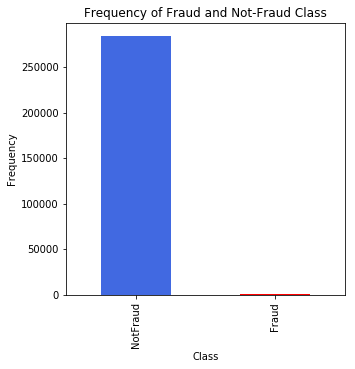

In [47]:
label = ['NotFraud', 'Fraud']

count_class = pd.value_counts(dataset['Class'], sort = True)
count_class.plot(kind = 'bar', color=('royalblue', 'red'), figsize=(5,5))
plt.xticks(range(2), label)
plt.tick_params(axis='x')
plt.title("Frequency of Fraud and Not-Fraud Class")
plt.xlabel("Class")
plt.ylabel("Frequency");

From the graph we can learn that the dataset is clearly *unbalanced* by presenting a minimum number of fraudulent transactions.

In [48]:
fraud_i=dataset[dataset.Class==1].index
notfraud_i=dataset[dataset.Class==0].index
fraud_num=len(fraud_i)
notfraud_num=len(notfraud_i)


In [49]:
fraud_perc=round(fraud_num/(fraud_num+notfraud_num),5)*100
print("The percentage of fraud of all transactions is ", fraud_perc, "%")


The percentage of fraud of all transactions is  0.173 %


The principal features to take in consideration are Time, Amount and Class to do an Exploration Data Analysis. 


Initially, I focus the attention on this three features and compare each of this.

In the following plot, I considered 2 features:
* *Amount*: which indicates the amount of money in USD 
* *Time:* the seconds elapsed between the first transition and the n-th.
displaying the sums of money per hour.

The **second_to_hour** variable is equal to 3600 as they correspond to the seconds related to an hour (60 * 60).


In [12]:
notFraud = dataset[dataset.Class == 0] 
fraud = dataset[dataset.Class == 1] 

In [13]:
second_to_hour=3600

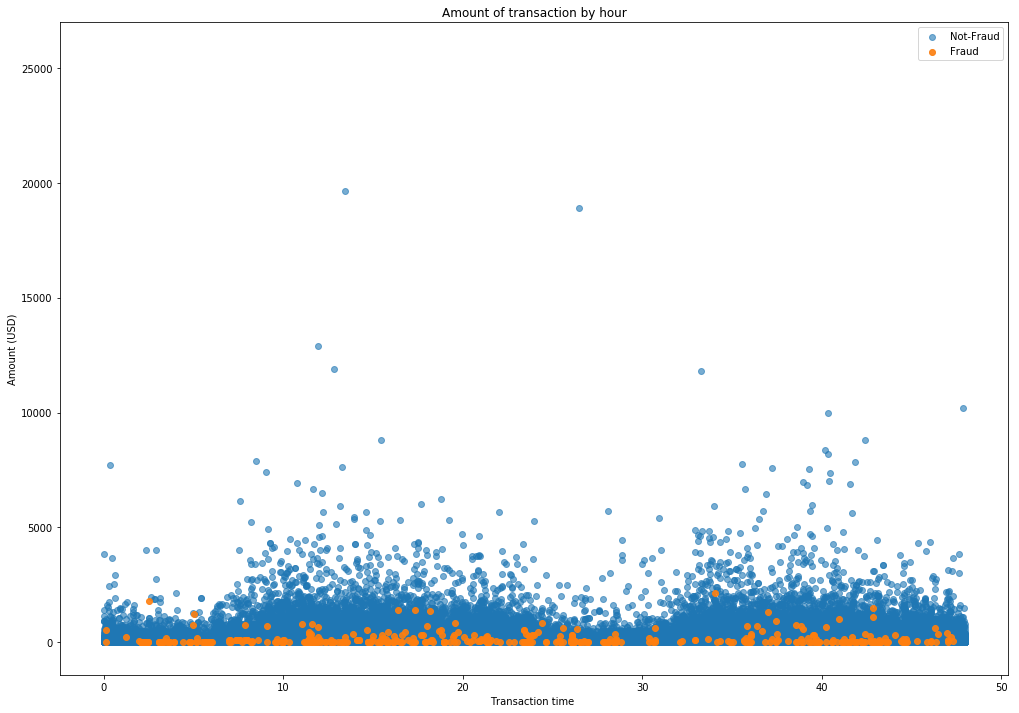

In [14]:
plt.figure(figsize=(17,12))
plt.scatter((notFraud.Time/(second_to_hour)), notFraud.Amount, alpha=0.6, label='Not-Fraud')
plt.scatter((fraud.Time/(second_to_hour)), fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time ")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In the next plot the time in 48h is shown on the x-axis, and the percentage of transactions on the y-axis.

Specifically, the dataset does not specify when the first transaction took place and therefore the time equal to 0.0 seconds.

It should also be noted that frauds occur between the values 2-8 and 25-29 so, if I assume that the value 0 on the x axis corresponds to the hour 12p.m. consequently frauds occur mostly during night-time periods.

But this presupposition must be verified as I do not know the exact time of the first transition.

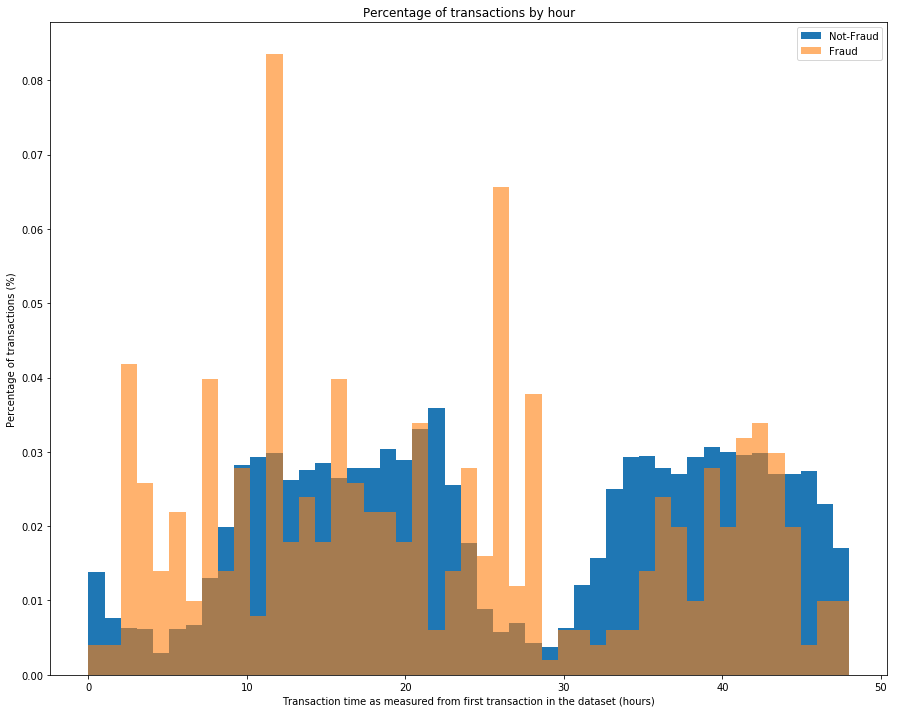

In [15]:
bins = np.linspace(0, 48, 48) #48 hours
plt.figure(figsize=(15,12))

plt.hist((notFraud.Time/(second_to_hour)), bins, alpha=1, normed=True, label='Not-Fraud')
plt.hist((fraud.Time/(second_to_hour)), bins, alpha=0.6, normed=True, label='Fraud')

plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");

plt.show()

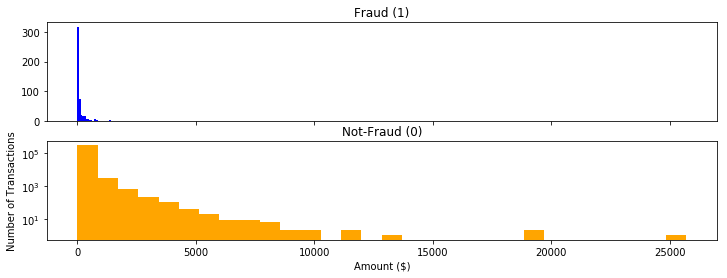

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(dataset.Amount[dataset.Class == 1], bins = bins, color='blue')
ax1.set_title('Fraud (1)')

ax2.hist(dataset.Amount[dataset.Class == 0], bins = bins, color='orange')
ax2.set_title('Not-Fraud (0)')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [17]:
print('Max Amount to Not-Fraud Detection is: $',max(dataset.Amount[dataset.Class==0]))        #max Amount($) Not-Fraud Transaction
print('Max Amount to Fraud Detection is: $',max(dataset.Amount[dataset.Class==1]))        #max Amount($) Fraud Transaction

Max Amount to Not-Fraud Detection is: $ 25691.16
Max Amount to Fraud Detection is: $ 2125.87


# 3. Data Visualization 


## t-SNE Method

The dataset contains only numeric input variables that are the result of a PCA transformation.
Values named V1 ... V28 have been derived from this transformation, which are not specified due to confidentiality problems. 

The only two untransformed variables were "Time" and "Amount".

To represent information, the data makes use of the **t-SNE** technique of Data Visualization
which analyzes the data and considers how to best represent these data 
using fewer dimensions by combining distributions

In [18]:
tsnedata = dataset

In [19]:
type(tsnedata)

pandas.core.frame.DataFrame

For computational problems related to my computer, to analize and explore the data 
in a better way, I reduce the dataset to 10000 samples with 31 features.

I create a df2 dataset that contains all the Fraudulent transactions and n normal transactions.



In [20]:
df2 = tsnedata[tsnedata.Class == 1]
df2 = pd.concat([df2, tsnedata[tsnedata.Class == 0].sample(n = 10000)], axis = 0)


In [21]:
#standard_scaler = StandardScaler()
df2_std = StandardScaler().fit_transform(df2)

#Set y equal to the target values.
y = df2.ix[:,-1].values

C:\Users\Pappa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [23]:
tsne = TSNE(n_components=2, random_state=0, verbose=1).fit_transform(df2_std)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10492 samples in 0.039s...
[t-SNE] Computed neighbors for 10492 samples in 15.723s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10492
[t-SNE] Computed conditional probabilities for sample 2000 / 10492
[t-SNE] Computed conditional probabilities for sample 3000 / 10492
[t-SNE] Computed conditional probabilities for sample 4000 / 10492
[t-SNE] Computed conditional probabilities for sample 5000 / 10492
[t-SNE] Computed conditional probabilities for sample 6000 / 10492
[t-SNE] Computed conditional probabilities for sample 7000 / 10492
[t-SNE] Computed conditional probabilities for sample 8000 / 10492
[t-SNE] Computed conditional probabilities for sample 9000 / 10492
[t-SNE] Computed conditional probabilities for sample 10000 / 10492
[t-SNE] Computed conditional probabilities for sample 10492 / 10492
[t-SNE] Mean sigma: 1.087067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.708633
[t-SNE] Er

In [24]:
tsne

array([[-61.624565 , -45.758358 ],
       [-63.41578  , -23.483286 ],
       [-63.452854 , -45.658676 ],
       ...,
       [ -2.5778797,  35.22561  ],
       [ 42.198578 , -55.69817  ],
       [ 46.93817  ,  12.543312 ]], dtype=float32)

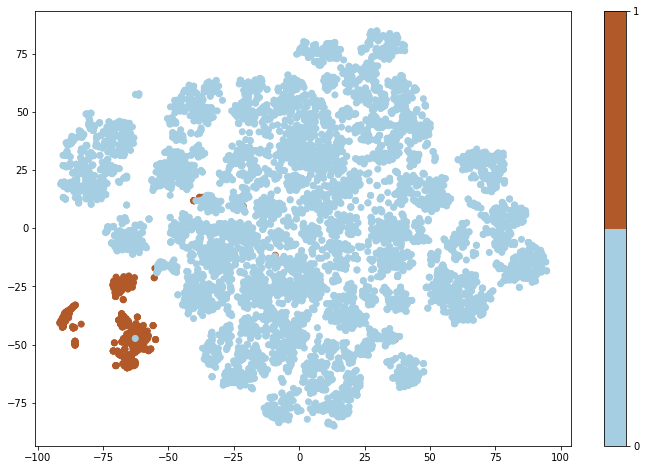

In [25]:
pyplot.figure(figsize=(12,8))
pyplot.scatter(tsne[:,0], tsne[:,1], c=y, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))

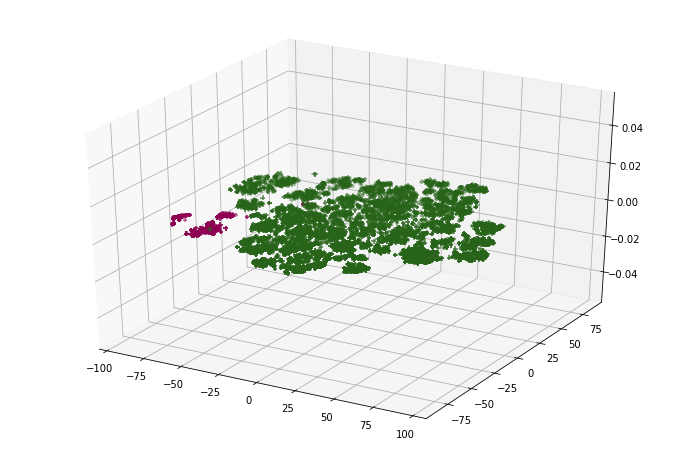

In [26]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne), c=y, cmap='PiYG_r', marker='+')
plt.show()

It is noted that the fraudulent and normal data are well separated.
* **Not Fraud :** marker green
* **Fraud :** marker purple